In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def read_csv_to_array(filename):
    data = np.genfromtxt(filename, delimiter=',', dtype=float)
    return data

In [4]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += f_wb - y[i]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [5]:
def compute_cost(predicted, actual):
    # mean squared error
    cost = 0
    m = actual.shape[0]
    for i in range(m):
        error_i = actual[i] - predicted[i]
        cost += error_i**2
    cost /= 2 * m;
    return cost

In [17]:
def gradient_descent(x, y, w_in=0, b_in=0, alpha=0.01, num_iterations=10000):
    cost_history = []
    w = w_in
    b = b_in
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        # save cost at each iteration
        if i < 100000: # prevent resource exhaustion
            predicted = w * x + b
            cost_history.append(compute_cost(predicted, y))
        # print cost at 10 intervals, or each iteration if < 10
        if i % math.ceil(num_iterations / 10) == 0:
            print(f"Iteration {i:4}: Cost {cost_history[-1]:.2e}    ",
                  f"dj_dw: {dj_dw:.3e}, dj_db: {dj_db:.3e}    ",
                  f"w: {w:.3e}, b: {b:.5e}")
    return w, b, cost_history

In [1]:
# data from https://www.marketwatch.com/
x_train = read_csv_to_array('x_train.csv')
y_train = read_csv_to_array('y_train.csv')

NameError: name 'read_csv_to_array' is not defined

In [16]:
w, b, J_history = gradient_descent(x_train, y_train, 1, 200, 0.0001)

Iteration    0: Cost 3.91e+03     dj_dw: 3.406e+03, dj_db: -8.862e+00     w: 6.594e-01, b: 2.00001e+02
Iteration 1000: Cost 3.56e+03     dj_dw: 1.832e-01, dj_db: -2.937e+01     w: 8.052e-01, b: 2.02975e+02
Iteration 2000: Cost 3.48e+03     dj_dw: 1.787e-01, dj_db: -2.865e+01     w: 7.871e-01, b: 2.05876e+02
Iteration 3000: Cost 3.40e+03     dj_dw: 1.743e-01, dj_db: -2.794e+01     w: 7.694e-01, b: 2.08705e+02
Iteration 4000: Cost 3.32e+03     dj_dw: 1.700e-01, dj_db: -2.726e+01     w: 7.522e-01, b: 2.11465e+02
Iteration 5000: Cost 3.25e+03     dj_dw: 1.658e-01, dj_db: -2.659e+01     w: 7.354e-01, b: 2.14157e+02
Iteration 6000: Cost 3.18e+03     dj_dw: 1.618e-01, dj_db: -2.594e+01     w: 7.190e-01, b: 2.16783e+02
Iteration 7000: Cost 3.12e+03     dj_dw: 1.578e-01, dj_db: -2.530e+01     w: 7.031e-01, b: 2.19344e+02
Iteration 8000: Cost 3.05e+03     dj_dw: 1.539e-01, dj_db: -2.468e+01     w: 6.875e-01, b: 2.21843e+02
Iteration 9000: Cost 2.99e+03     dj_dw: 1.501e-01, dj_db: -2.407e+01    

In [9]:
def saveModel(w, b):
    np.savetxt('model.csv', [w, b])

In [10]:
saveModel(w, b)

In [11]:
print(f'f_wb(x) = {w:.3f}x + {b:.3f}')
fx = w*x_train + b

f_wb(x) = 0.657x + 226.655


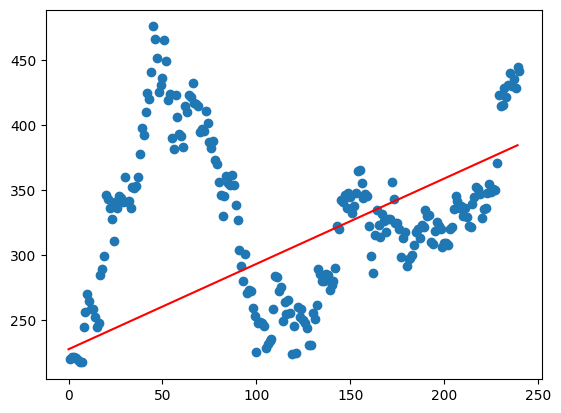

In [12]:
plt.scatter(x_train, y_train)
plt.plot(fx, color='r')
plt.show()

In [16]:
x_future = read_csv_to_array('x_predict.csv')
y_future = read_csv_to_array('y_predict.csv')

In [17]:
predicted_future = w*x_future + b

In [18]:
for i in range(y_future.shape[0]):
    print(f"{int(x_future[i])}: |{predicted_future[i]:.2f} - {y_future[i]}| = {abs(predicted_future[i] - y_future[i]):.2f}")
cost_future = compute_cost(predicted_future, y_future)
print(f"Cost of future predictions: {cost_future:.2f}")

241: |385.10 - 443.8| = 58.70
242: |385.76 - 470.54| = 84.78
243: |386.42 - 443.29| = 56.87
244: |387.08 - 440.75| = 53.67
245: |387.73 - 447.82| = 60.09
246: |388.39 - 437.57| = 49.18
247: |389.05 - 431.81| = 42.76
248: |389.71 - 436.54| = 46.83
249: |390.36 - 423.53| = 33.17
250: |391.02 - 426.79| = 35.77
Cost of future predictions: 1458.85


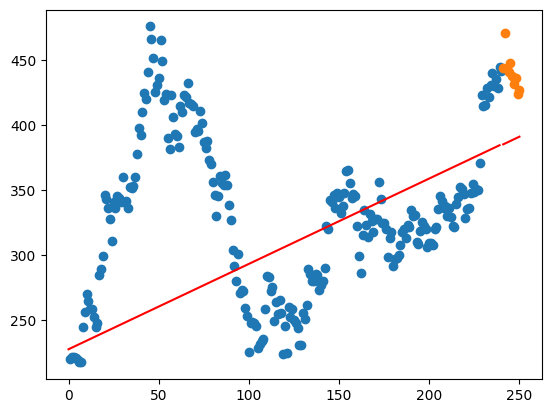

In [19]:
plt.scatter(x_train, y_train)
plt.plot(fx, color='r')
plt.scatter(x_future, y_future)
plt.plot(x_future, predicted_future, color='r')
plt.show()